In [ ]:
import numpy as np
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import any required libraries here
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def _load_data(file_path):
    # tbd: load the parquet file from file_path and return as pandas DataFrame
    data = pq.read_pandas(file_path).to_pandas()
    return data

path = '/content/drive/MyDrive/BuildingDataset_final/'

oh14 = _load_data(file_path = path + 'OH14.parquet')
oh12 = _load_data(file_path = path + 'OH12.parquet')
chemie = _load_data(file_path = path + 'Chemie.parquet')
hg2 = _load_data(file_path = path + 'HGII.parquet')
kita_hokida = _load_data(file_path = path + 'Kita_hokida.parquet')
tagespflege = _load_data(file_path = path + 'Großtagespflege.parquet')


In [ ]:
def plot_df(df): 
    '''
    Plotting the features from the dataframe
    
    Parameters:
    df(pd.Dataframe): Dataframe to use       

    Returns:
    df (pd.Dataframe): parquet-file as pandas.Dataframe   
    
    '''
    for i, column in enumerate(df.drop(['Time', 'Day', 'Dayofweek', 'Hourofday','Normalize_timestamp', 'TT_TU', 'label'], axis=1).columns):
        sns.set(rc={"figure.figsize":(19, 4)})
        sns.lineplot(x=df['Time'], y=df[column], )
        My_Title = df.columns[i+1]
        plt.title(My_Title)
        plt.show()


In [ ]:
oh14_w = oh14.resample('7D', on='Time').mean().reset_index()
plot_df(oh14_w)

In [ ]:
chemie_w = ch.resample('7D', on='Time').mean().reset_index()
plot_df(chemie_w)

In [ ]:
tagespf_w = tagespflege.resample('7D', on='Time').mean().reset_index()
plot_df(tagespf_w)

In [ ]:
from datetime import date 
def plot_wday_week(df, feature):
  df_m = df.loc[ :,['Time',feature]]
  df_m['weekday']=df_m['Time'].dt.weekday
  df_m['week']=df_m['Time'].dt.isocalendar().week

  dfp = pd.pivot_table(data=df_m, index='weekday', columns='week', aggfunc='mean')
  ax = dfp.plot(ylabel=feature, figsize=(6, 4))
  ax.set_xticks(dfp.index)
  ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
  

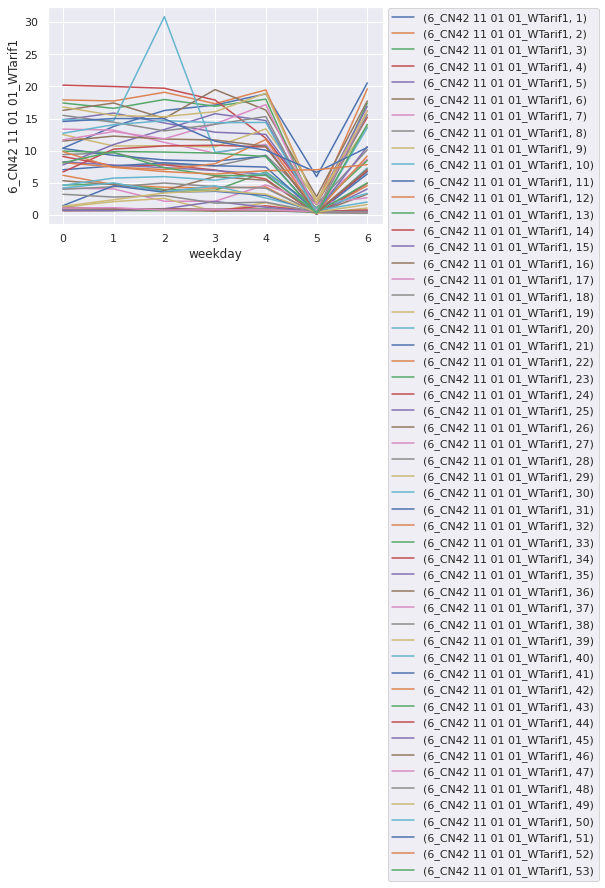

In [ ]:
#kita_2 = kita[(kita['Time'] >= '2021-12-20 00:00:00') & (kita['Time'] <= '2022-04-05 02:15:00')]
plot_wday_week(kita_2,'6_CN42 11 01 01_WTarif1')
#07.03.2022 outlier 

In [ ]:
plot_wday_week(kita,'6_CN42 11 01 01_Dfluss')
plot_wday_week(kita,'6_CN42 11 01 01_Vorlauftmp')
plot_wday_week(kita,'8_CN42 41 01 01_VK1')
plot_wday_week(kita,'6_CN42 11 01 01_Rücklauftmp')


In [ ]:
#plot_wday_week(kita,'6_CN42 11 01 01_WTarif1')
plot_wday_week(kita,'6_CN42 11 01 01_Dfluss')
plot_wday_week(kita,'6_CN42 11 01 01_Vorlauftmp')
plot_wday_week(kita,'8_CN42 41 01 01_VK1')

In [ ]:
def plot_hour_wday(df, feature):
  df_m = df.loc[ :,['Time',feature]]
  df_m['weekday']=df_m['Time'].dt.weekday
  df_m['hour']=df_m['Time'].dt.time

  dfp = pd.pivot_table(data=df_m, index='hour', columns='weekday', aggfunc='mean')
  ax = dfp.plot(ylabel=feature, figsize=(16, 4), )
  ax.set_xticks(dfp.index)
  ax.tick_params(labelrotation=90)
  ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

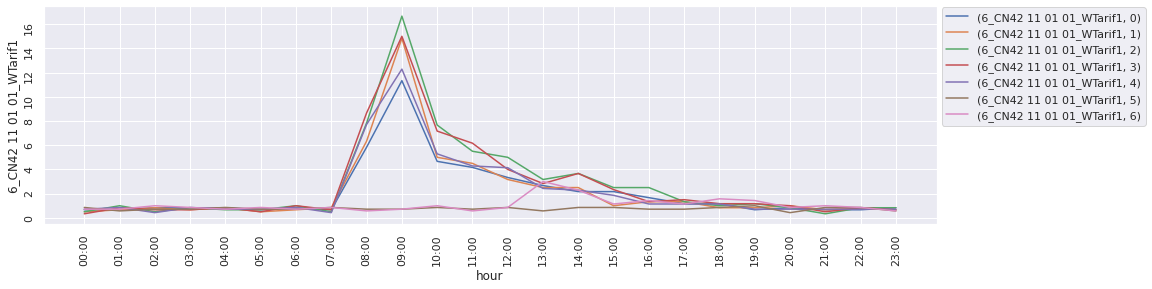

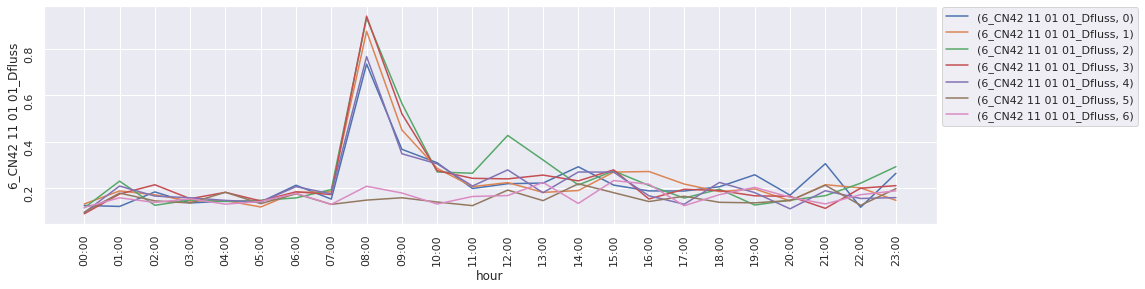

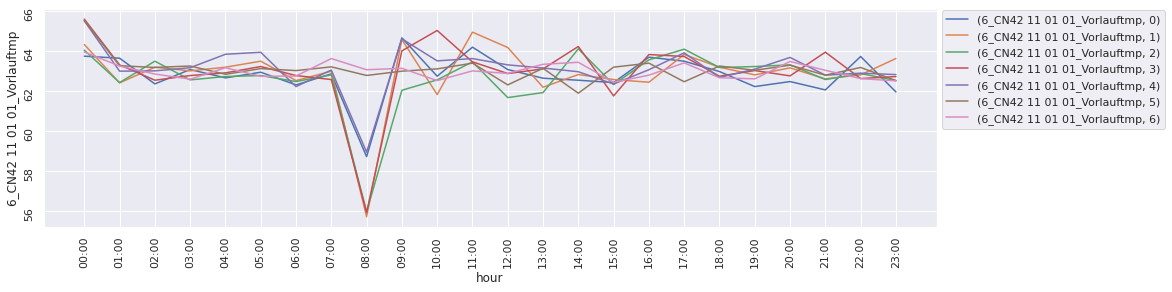

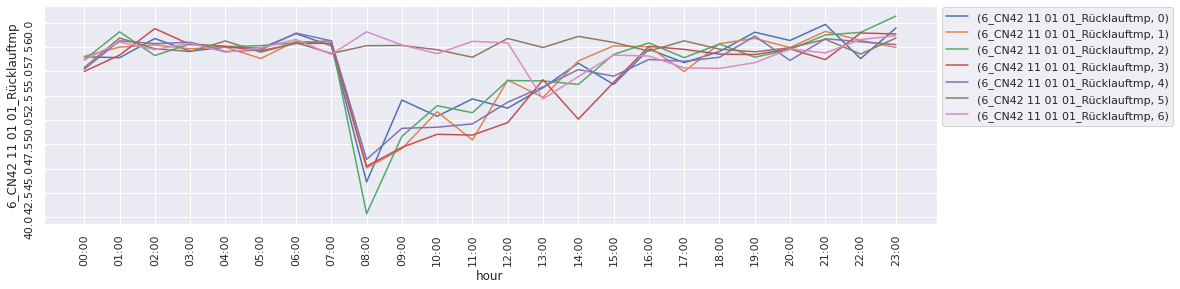

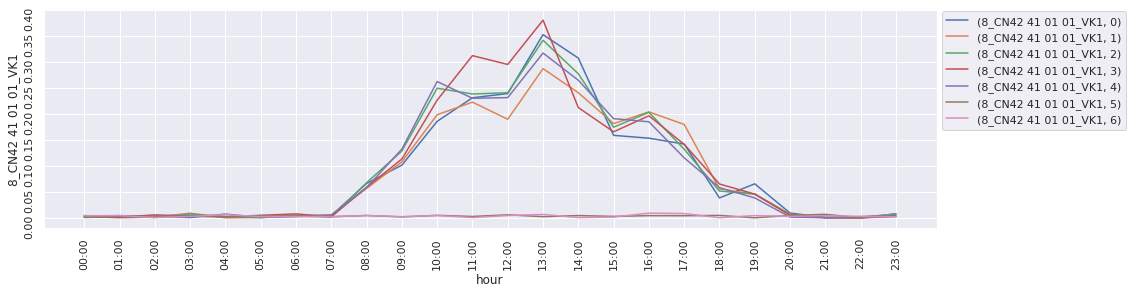

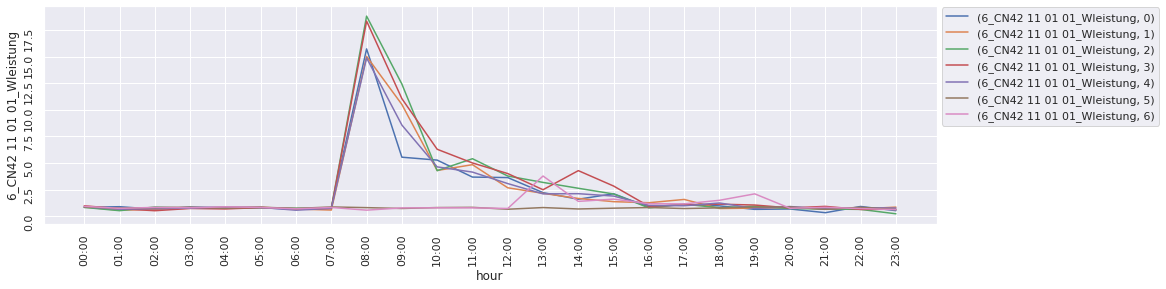

In [ ]:
#August till semesterstart
kita_2 = kita[(kita['Time'] >= '2021-08-20 00:00:00') & (kita['Time'] <= '2021-10-03 23:45:00')]
plot_hour_wday(kita_2,'6_CN42 11 01 01_WTarif1')
plot_hour_wday(kita_2,'6_CN42 11 01 01_Dfluss')
plot_hour_wday(kita_2,'6_CN42 11 01 01_Vorlauftmp')
plot_hour_wday(kita_2,'6_CN42 11 01 01_Rücklauftmp')
plot_hour_wday(kita_2,'8_CN42 41 01 01_VK1')
plot_hour_wday(kita_2,'6_CN42 11 01 01_Wleistung')


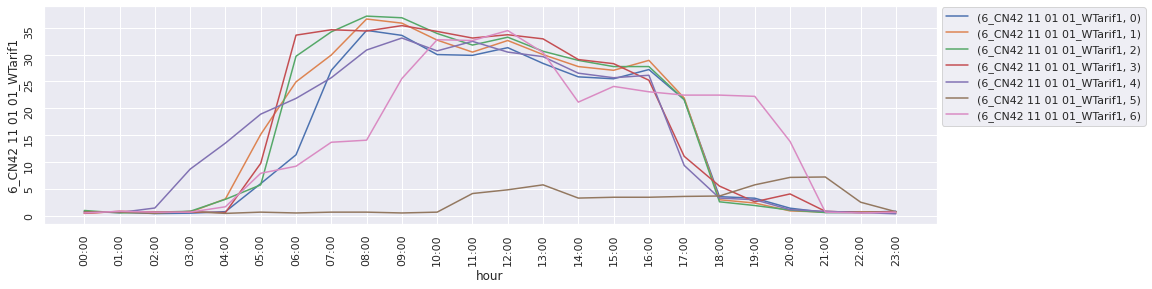

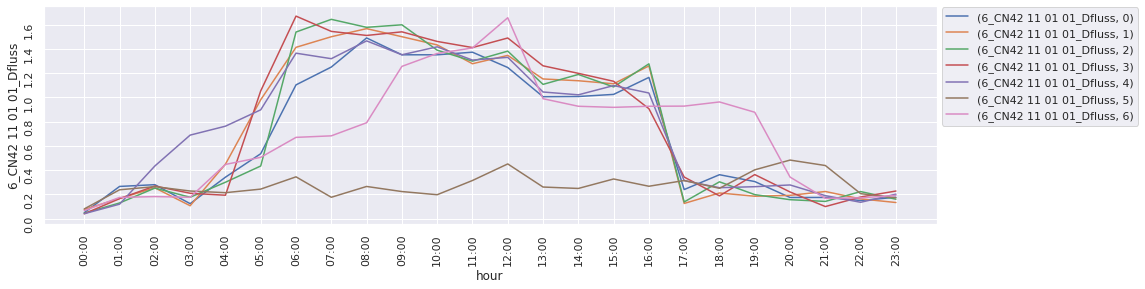

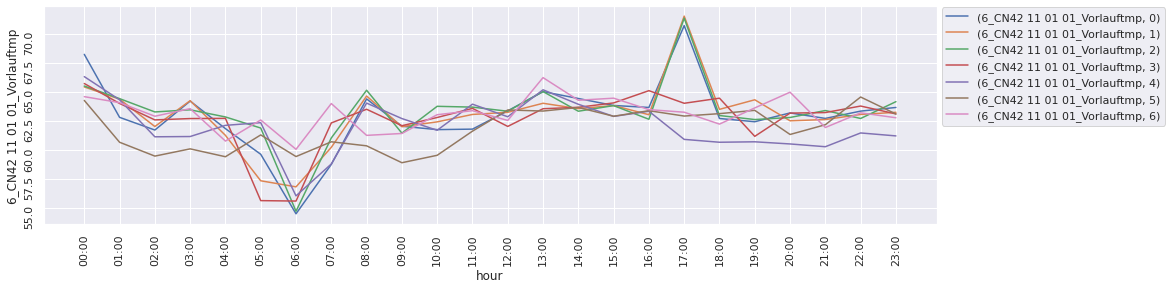

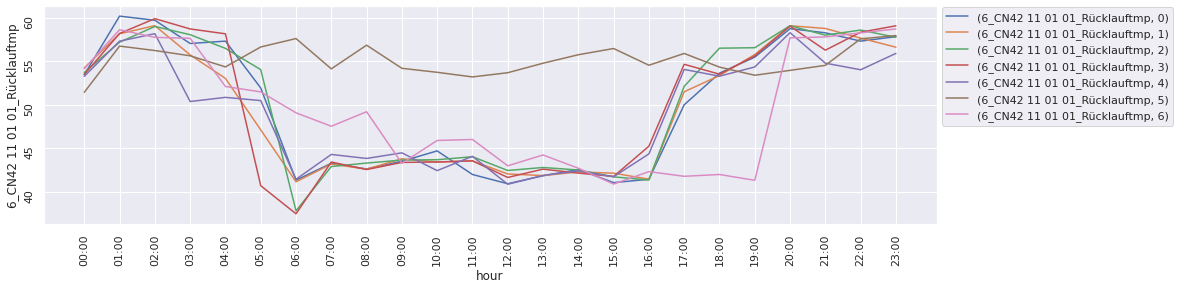

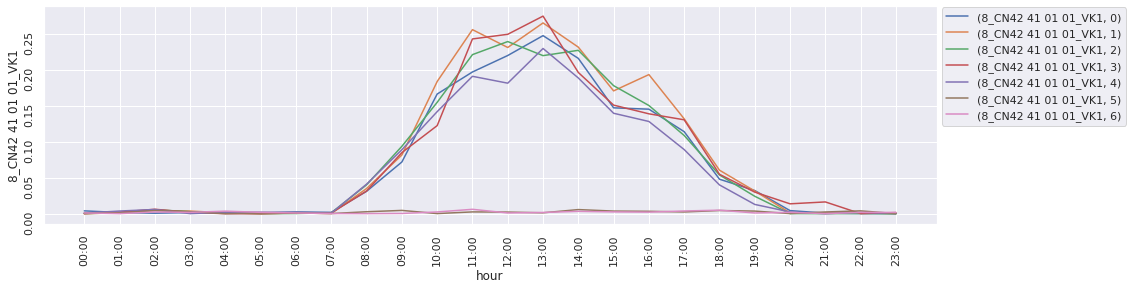

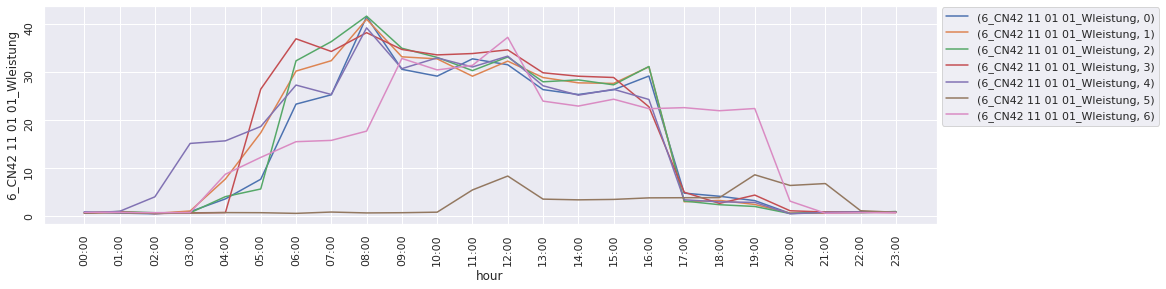

In [ ]:
#winter
kita_2 = kita[(kita['Time'] >= '2021-11-01 00:00:00') & (kita['Time'] <= '2022-01-31 23:45:00')]
plot_hour_wday(kita_2,'6_CN42 11 01 01_WTarif1')
plot_hour_wday(kita_2,'6_CN42 11 01 01_Dfluss')
plot_hour_wday(kita_2,'6_CN42 11 01 01_Vorlauftmp')
plot_hour_wday(kita_2,'6_CN42 11 01 01_Rücklauftmp')
plot_hour_wday(kita_2,'8_CN42 41 01 01_VK1')
plot_hour_wday(kita_2,'6_CN42 11 01 01_Wleistung')


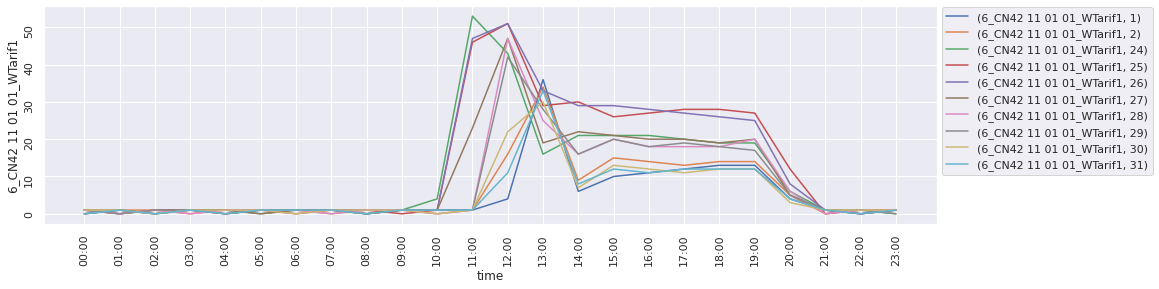

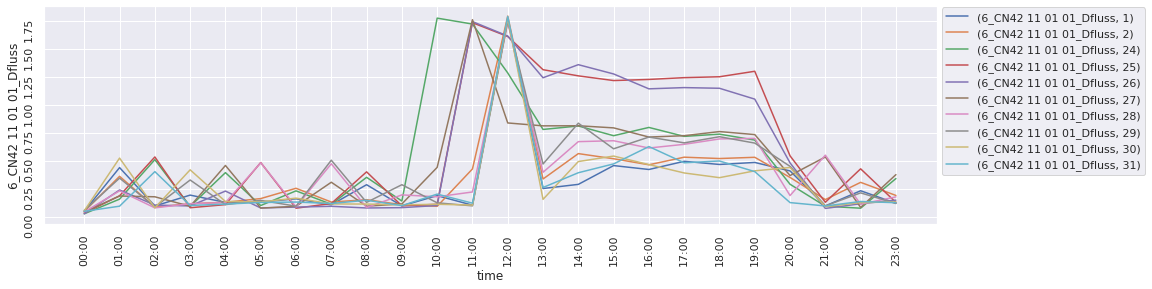

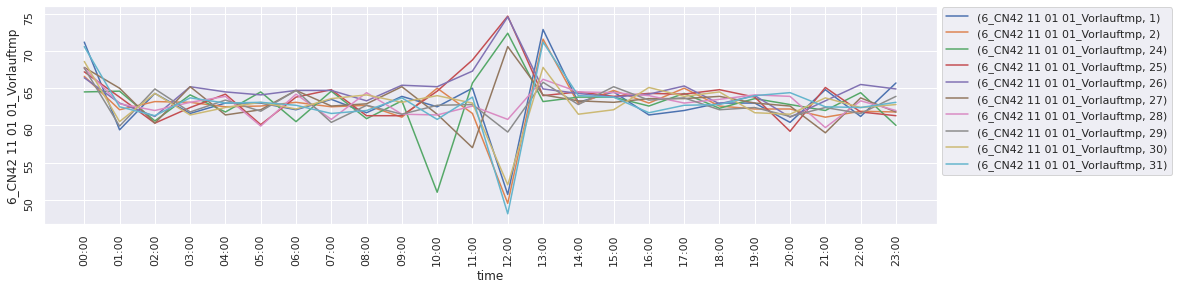

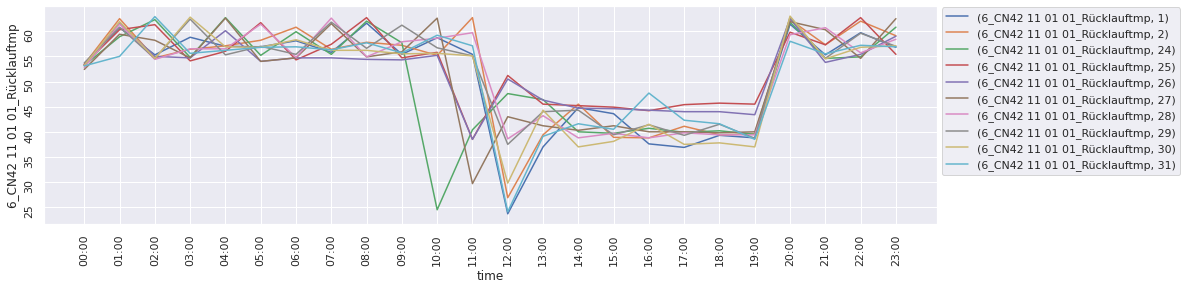

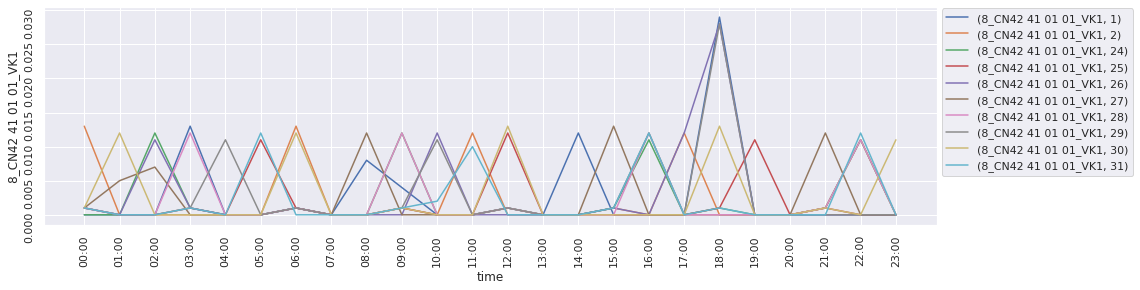

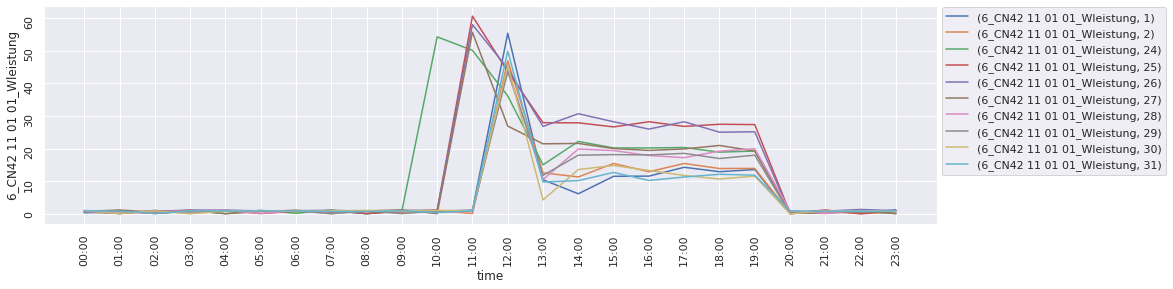

In [ ]:
def plot_day_hour(df, feature):
  df_m = df.loc[ :,['Time',feature]]
  df_m['day']=df_m['Time'].dt.day
  df_m['time']= df_m['Time'].dt.time

  dfp = pd.pivot_table(data=df_m, index='Time', columns='day')
  ax = dfp.plot(ylabel=feature, figsize=(16, 4), )
  ax.set_xticks(dfp.index)
  ax.tick_params(labelrotation=90)
  ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

#during christmas_break 
kita_2 = kita[(kita['Time'] >= '2021-12-24 00:00:00') & (kita['Time'] <= '2022-01-02 23:45:00')]
plot_day_hour(kita_2,'6_CN42 11 01 01_WTarif1')
plot_day_hour(kita_2,'6_CN42 11 01 01_Dfluss')
plot_day_hour(kita_2,'6_CN42 11 01 01_Vorlauftmp')
plot_day_hour(kita_2,'6_CN42 11 01 01_Rücklauftmp')
plot_day_hour(kita_2,'8_CN42 41 01 01_VK1')
plot_day_hour(kita_2,'6_CN42 11 01 01_Wleistung')

OH12

In [ ]:
#this is a server room so patterns are not that obvious here

oh12_2 = oh12[(oh12['Time'] >= '2021-01-04 00:00:00') & (oh12['Time'] <= '2021-02-28 23:45:00')]
plot_day_hour(oh12_2,'6_CN45 11 01 01_WTarif1')
plot_day_hour(oh12_2,'6_CN45 11 01 01_Dfluss')
plot_day_hour(oh12_2, '6_CN45 11 01 01_Vol')
plot_day_hour(oh12_2,'6_CN45 11 01 01_Vorlauftmp')
plot_day_hour(oh12_2,'6_CN45 11 01 01_Rücklauftmp')
plot_day_hour(oh12_2,'6_CN45 11 01 01_TmpDiff')
plot_day_hour(oh12_2,'6_CN45 11 01 01_Wleistung')


In [ ]:
oh12_2 = oh12[(oh12['Time'] >= '2021-08-20 00:00:00') & (oh12['Time'] <= '2021-09-20 23:45:00')]
plot_day_hour(oh12_2,'6_CN45 11 01 01_WTarif1')
plot_day_hour(oh12_2,'6_CN45 11 01 01_Dfluss')
plot_day_hour(oh12_2, '6_CN45 11 01 01_Vol')
plot_day_hour(oh12_2,'6_CN45 11 01 01_Vorlauftmp')
plot_day_hour(oh12_2,'6_CN45 11 01 01_Rücklauftmp')
plot_day_hour(oh12_2,'6_CN45 11 01 01_TmpDiff')
plot_day_hour(oh12_2,'6_CN45 11 01 01_Wleistung')


#during winter
oh12_w = oh12[(oh12['Time'] >= '2021-11-01 00:00:00') & (oh12['Time'] <= '2022-01-31 23:45:00')]
plot_day_hour(oh12_w,'6_CN45 11 01 01_WTarif1')
plot_day_hour(oh12_w,'6_CN45 11 01 01_Dfluss')
plot_day_hour(oh12_w, '6_CN45 11 01 01_Vol')
plot_day_hour(oh12_w,'6_CN45 11 01 01_Vorlauftmp')
plot_day_hour(oh12_w,'6_CN45 11 01 01_Rücklauftmp')
plot_day_hour(oh12_w,'6_CN45 11 01 01_TmpDiff')
plot_day_hour(oh12_w,'6_CN45 11 01 01_Wleistung')


In [ ]:
#exam
oh14_2 = oh14[(oh14['Time'] >= '2021-11-01 00:00:00') & (oh14['Time'] <= '2021-12-05 23:45:00')]
plot_day_hour(oh14_2,'6_CN37 11 01 01_WTarif1')
plot_day_hour(oh14_2,'6_CN37 11 01 01_Dfluss')
plot_day_hour(oh14_2, '6_CN37 11 01 01_Vol')
plot_day_hour(oh14_2,'6_CN37 11 01 01_Vorlauftmp')
plot_day_hour(oh14_2,'6_CN37 11 01 01_Rücklauftmp')
plot_day_hour(oh14_2,'6_CN37 11 01 01_TmpDiff')
plot_day_hour(oh14_2,'6_CN37 11 01 01_Wleistung')


OH14

In [ ]:
oh14_2 = oh14[(oh14['Time'] >= '2021-08-20 00:00:00') & (oh14['Time'] <= '2021-09-20 23:45:00')]
plot_day_hour(oh14_2,'6_CN37 11 01 01_WTarif1')
plot_day_hour(oh14_2,'6_CN37 11 01 01_Dfluss')
plot_day_hour(oh14_2, '6_CN37 11 01 01_Vol')
plot_day_hour(oh14_2,'6_CN37 11 01 01_Vorlauftmp')
plot_day_hour(oh14_2,'6_CN37 11 01 01_Rücklauftmp')
plot_day_hour(oh14_2,'6_CN37 11 01 01_TmpDiff')
plot_day_hour(oh14_2,'6_CN37 11 01 01_Wleistung')


#during winter
oh14_w = oh14[(oh14['Time'] >= '2021-11-01 00:00:00') & (oh14['Time'] <= '2022-01-31 23:45:00')]
plot_day_hour(oh14_w,'6_CN37 11 01 01_WTarif1')
plot_day_hour(oh14_w,'6_CN37 11 01 01_Dfluss')
plot_day_hour(oh14_w, '6_CN37 11 01 01_Vol')
plot_day_hour(oh14_w,'6_CN37 11 01 01_Vorlauftmp')
plot_day_hour(oh14_w,'6_CN37 11 01 01_Rücklauftmp')
plot_day_hour(oh14_w,'6_CN37 11 01 01_TmpDiff')
plot_day_hour(oh14_w,'6_CN37 11 01 01_Wleistung')

Großtagespflege

In [ ]:
t_exam= tagespflege[(tagespflege['Time'] >= '2022-01-17 00:00:00') & (tagespflege['Time'] <= '2022-02-28 23:45:00')]
plot_day_hour(t_exam,'6_CS89 12 01 01_WTarif1')
plot_day_hour(t_exam,'6_CS89 12 01 01_Dfluss')
plot_day_hour(t_exam, '6_CS89 12 01 01_Vol')
plot_day_hour(t_exam,'6_CS89 12 01 01_Vorlauftmp')
plot_day_hour(t_exam,'6_CS89 12 01 01_Rücklauftmp')
plot_day_hour(t_exam,'6_CS89 12 01 01_TmpDiff')
plot_day_hour(t_exam,'6_CS89 12 01 01_Wleistung')

tages_2 = tagespflege[(tagespflege['Time'] >= '2022-04-20 00:00:00') & (tagespflege['Time'] <= '2022-07-20 23:45:00')]
plot_day_hour(tages_2,'6_CS89 12 01 01_WTarif1')
plot_day_hour(tages_2,'6_CS89 12 01 01_Dfluss')
plot_day_hour(tages_2, '6_CS89 12 01 01_Vol')
plot_day_hour(tages_2,'6_CS89 12 01 01_Vorlauftmp')
plot_day_hour(tages_2,'6_CS89 12 01 01_Rücklauftmp')
plot_day_hour(tages_2,'6_CS89 12 01 01_TmpDiff')
plot_day_hour(tages_2,'6_CS89 12 01 01_Wleistung')

#during winter
tagespflege_w = tagespflege[(tagespflege['Time'] >= '2021-11-01 00:00:00') & (tagespflege['Time'] <= '2022-01-31 23:45:00')]
plot_day_hour(tagespflege_w,'6_CS89 12 01 01_WTarif1')
plot_day_hour(tagespflege_w,'6_CS89 12 01 01_Dfluss')
plot_day_hour(tagespflege_w, '6_CS89 12 01 01_Vol')
plot_day_hour(tagespflege_w,'6_CS89 12 01 01_Vorlauftmp')
plot_day_hour(tagespflege_w,'6_CS89 12 01 01_Rücklauftmp')
plot_day_hour(tagespflege_w,'6_CS89 12 01 01_TmpDiff')
plot_day_hour(tagespflege_w,'6_CS89 12 01 01_Wleistung')

Chemie

In [ ]:
ch_exam= ch[(ch['Time'] >= '2022-01-04 00:00:00') & (ch['Time'] <= '2022-02-28 23:45:00')]
plot_day_hour(ch_exam,'6_CN05 11 01 01_WTarif1')
plot_day_hour(ch_exam,'6_CN05 11 01 01_Dfluss')
plot_day_hour(ch_exam, '8_CN05 41 01 04_VK1')
plot_day_hour(ch_exam,'6_CN05 11 01 01_Vorlauftmp')
plot_day_hour(ch_exam,'6_CN05 11 01 01_Rücklauftmp')
plot_day_hour(ch_exam,'6_CN05 11 01 01_Wleistung')

#august till semesterstart
ch_2 = ch[(ch['Time'] >= '2021-08-20 00:00:00') & (ch['Time'] <= '2021-10-03 23:45:00')]
plot_day_hour(ch_2,'6_CN05 11 01 01_WTarif1')
plot_day_hour(ch_2,'6_CN05 11 01 01_Dfluss')
plot_day_hour(ch_2, '8_CN05 41 01 04_VK1')
plot_day_hour(ch_2,'6_CN05 11 01 01_Vorlauftmp')
plot_day_hour(ch_2,'6_CN05 11 01 01_Rücklauftmp')
plot_day_hour(ch_2,'6_CN05 11 01 01_Wleistung')

#during winter
ch_w = ch[(ch['Time'] >= '2021-11-01 00:00:00') & (ch['Time'] <= '2022-01-31 23:45:00')]
plot_day_hour(ch_w,'6_CN05 11 01 01_WTarif1')
plot_day_hour(ch_w,'6_CN05 11 01 01_Dfluss')
plot_day_hour(ch_w, '8_CN05 41 01 04_VK1')
plot_day_hour(ch_w,'6_CN05 11 01 01_Vorlauftmp')
plot_day_hour(ch_w,'6_CN05 11 01 01_Rücklauftmp')
plot_day_hour(ch_w,'6_CN05 11 01 01_Wleistung')

HG2

In [ ]:
hg2_exam = hg2[(hg2['Time'] >= '2022-01-04 00:00:00') & (hg2['Time'] <= '2022-02-28 23:45:00')]
plot_day_hour(hg2_exam,'6_CN08 12 01 13_WTarif1')
plot_day_hour(hg2_exam,'6_CN08 12 01 13_Dfluss')
plot_day_hour(hg2_exam, '6_CN08 12 01 13_Vol')
plot_day_hour(hg2_exam,'6_CN08 12 01 13_Vorlauftmp')
plot_day_hour(hg2_exam,'6_CN08 12 01 13_Rücklauftmp')
plot_day_hour(hg2_exam,'6_CN08 12 01 13_Wleistung')

hg2_2 = hg2[(hg2['Time'] >= '2021-08-20 00:00:00') & (hg2['Time'] <= '2021-10-03 23:45:00')]
plot_day_hour(hg2_2,'6_CN08 12 01 13_WTarif1')
plot_day_hour(hg2_2,'6_CN08 12 01 13_Dfluss')
plot_day_hour(hg2_2, '6_CN08 12 01 13_Vol')
plot_day_hour(hg2_2,'6_CN08 12 01 13_Vorlauftmp')
plot_day_hour(hg2_2,'6_CN08 12 01 13_Rücklauftmp')
plot_day_hour(hg2_2,'6_CN08 12 01 13_Wleistung')


hg2_w = hg2[(hg2['Time'] >= '2021-11-01 00:00:00') & (hg2['Time'] <= '2022-01-31 23:45:00')]
plot_day_hour(hg2_w,'6_CN08 12 01 13_WTarif1')
plot_day_hour(hg2_w,'6_CN08 12 01 13_Dfluss')
plot_day_hour(hg2_w, '6_CN08 12 01 13_Vol')
plot_day_hour(hg2_w,'6_CN08 12 01 13_Vorlauftmp')
plot_day_hour(hg2_w,'6_CN08 12 01 13_Rücklauftmp')
plot_day_hour(hg2_w,'6_CN08 12 01 13_Wleistung')